In [1]:
import math
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import seaborn as sns
import matplotlib.pyplot as plt

In [141]:
data=pd.read_csv('Jikimu_data.csv')
data.head()

,Scheme Name,Net Asset Value,Outstanding Number of Units,Nav Per Unit,Sale Price per Unit,Repurchase Price/Unit,Date Valued
0,Jikimu Fund,1.912265e+10,120180812.9,159.1157,159.1157,155.9333,12/30/2022
1,Jikimu Fund,1.909805e+10,120102700.6,159.0143,159.0143,155.8340,12/29/2022
2,Jikimu Fund,1.911025e+10,120205865.7,158.9794,158.9794,155.7998,12/28/2022
3,Jikimu Fund,1.910533e+10,120200845.8,158.9450,158.9450,155.7661,12/27/2022
4,Jikimu Fund,1.908263e+10,120161666.2,158.8080,158.8080,155.6318,12/23/2022


In [142]:
data.shape

(1668, 7)

In [143]:
data.head()

,Scheme Name,Net Asset Value,Outstanding Number of Units,Nav Per Unit,Sale Price per Unit,Repurchase Price/Unit,Date Valued
0,Jikimu Fund,1.912265e+10,120180812.9,159.1157,159.1157,155.9333,12/30/2022
1,Jikimu Fund,1.909805e+10,120102700.6,159.0143,159.0143,155.8340,12/29/2022
2,Jikimu Fund,1.911025e+10,120205865.7,158.9794,158.9794,155.7998,12/28/2022
3,Jikimu Fund,1.910533e+10,120200845.8,158.9450,158.9450,155.7661,12/27/2022
4,Jikimu Fund,1.908263e+10,120161666.2,158.8080,158.8080,155.6318,12/23/2022


In [144]:
data['Net Asset Value'] = np.sqrt(data['Net Asset Value'])
data['Outstanding Number of Units'] = np.sqrt(data['Outstanding Number of Units'])

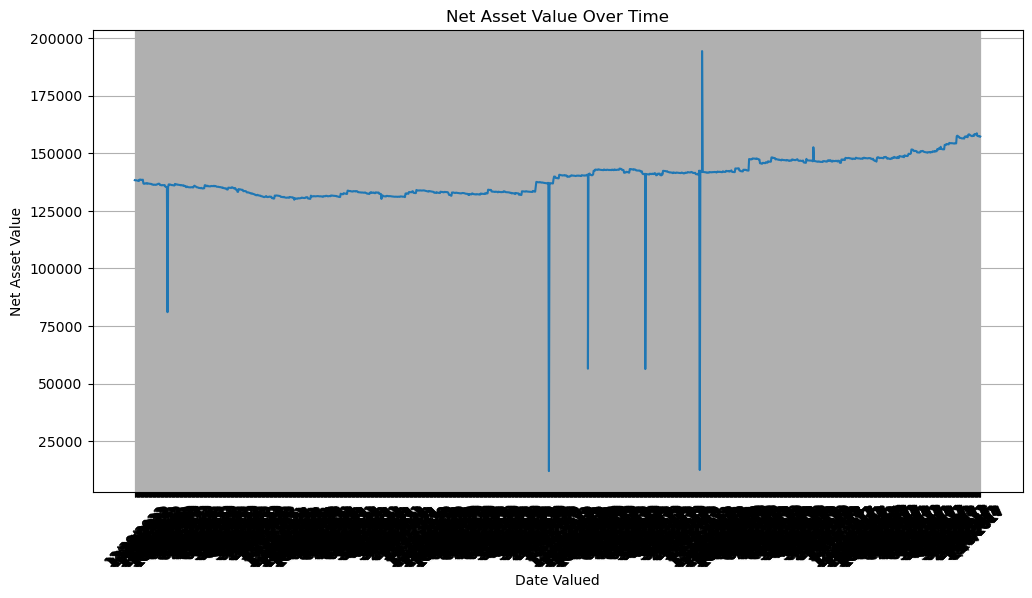

In [145]:
# Time series plot of NAV
plt.figure(figsize=(12, 6))
plt.plot(data['Date Valued'], data['Net Asset Value'])
plt.xlabel('Date Valued')
plt.ylabel('Net Asset Value')
plt.title('Net Asset Value Over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [146]:
data.set_index('Date Valued', inplace=True)

In [147]:
data.head()

,Scheme Name,Net Asset Value,Outstanding Number of Units,Nav Per Unit,Sale Price per Unit,Repurchase Price/Unit
Date Valued,,,,,,
12/30/2022,Jikimu Fund,138284.666171,10962.700986,159.1157,159.1157,155.9333
12/29/2022,Jikimu Fund,138195.676579,10959.137767,159.0143,159.0143,155.8340
12/28/2022,Jikimu Fund,138239.837793,10963.843564,158.9794,158.9794,155.7998
12/27/2022,Jikimu Fund,138222.014705,10963.614632,158.9450,158.9450,155.7661
12/23/2022,Jikimu Fund,138139.909581,10961.827685,158.8080,158.8080,155.6318


In [148]:
df=data.filter(['Net Asset Value'])
dataset=df.values
training_data_len=math.ceil(len(dataset)*.8)
training_data_len

1335

In [149]:
df.head()

,Net Asset Value
Date Valued,
12/30/2022,138284.666171
12/29/2022,138195.676579
12/28/2022,138239.837793
12/27/2022,138222.014705
12/23/2022,138139.909581


In [150]:
## scale the data
scaler= MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)
scaled_data

array([[0.69260529],
       [0.69211689],
       [0.69235926],
       ...,
       [0.79682437],
       [0.79740453],
       [0.79667283]])

In [151]:
#create the training set
#create the scaled training set
train_data=scaled_data[0:training_data_len, :]
print(train_data[:5])

[[0.69260529]
 [0.69211689]
 [0.69235926]
 [0.69226144]
 [0.69181083]]


In [152]:
#split the data into x_train and y_train
x_train=[]
y_train=[]
for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    if i<=60:
        print(x_train)
        print(y_train)

[array([0.69260529, 0.69211689, 0.69235926, 0.69226144, 0.69181083,
       0.69136495, 0.6913872 , 0.69045628, 0.69378741, 0.69337985,
       0.69400893, 0.69374471, 0.69305962, 0.69274922, 0.69381413,
       0.68479583, 0.68392558, 0.68422649, 0.68456892, 0.68537863,
       0.68500831, 0.68425072, 0.68542838, 0.68470944, 0.68462432,
       0.68419228, 0.684196  , 0.68387529, 0.68375201, 0.68364288,
       0.68219716, 0.68229805, 0.68193898, 0.68135441, 0.68199502,
       0.68188769, 0.6815733 , 0.68135808, 0.68249374, 0.68251738,
       0.68318716, 0.68423252, 0.68412375, 0.68398794, 0.68114031,
       0.68100357, 0.68076376, 0.68026482, 0.68084798, 0.68087956,
       0.68051283, 0.68063925, 0.68098524, 0.67779242, 0.67672003,
       0.67655266, 0.67653822, 0.3783492 , 0.67562424, 0.6824107 ])]
[0.6825981922962981]


In [153]:
#convert the x_train and y_train into numpy array
x_train,y_train=np.array(x_train),np.array(y_train)

In [154]:
#reshape the data
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1275, 60, 1)

In [155]:
#buld LSTM model
model=Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(60, 1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [156]:
#complite the model
model.compile(loss='mean_squared_error', optimizer='adam')

In [157]:
#train the model
model.fit(x_train, y_train, batch_size=1, epochs=2)

Epoch 1/2
1275/1275 [==============================] - 49s 35ms/step - loss: 0.0043
Epoch 2/2
1275/1275 [==============================] - 48s 38ms/step - loss: 0.0022


In [158]:
# #create the testing dataset
test_data=scaled_data[training_data_len-60:,:]
x_test=[]
y_test=dataset[training_data_len:,:]
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [159]:
#convert the data to numpy array
x_test=np.array(x_test)

In [160]:
#reshape the data
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
x_test.shape

(333, 60, 1)

In [161]:
#get the model prediction
predictions=model.predict(x_test)
predictions=scaler.inverse_transform(predictions)
predictions

11/11 [==============================] - 1s 23ms/step


array([[143050.61],
       [143049.12],
       [143045.03],
       [143042.42],
       [143040.77],
       [143031.86],
       [143020.06],
       [143002.83],
       [142984.27],
       [142963.8 ],
       [142944.06],
       [142934.72],
       [142931.39],
       [142910.78],
       [142883.3 ],
       [142849.81],
       [142816.02],
       [142776.38],
       [142737.14],
       [142702.36],
       [142672.75],
       [142648.31],
       [142628.6 ],
       [142599.64],
       [142568.5 ],
       [142599.92],
       [142660.06],
       [142737.42],
       [142817.28],
       [142892.33],
       [142958.6 ],
       [143014.72],
       [143059.81],
       [143095.42],
       [143111.44],
       [143116.16],
       [143114.78],
       [143110.31],
       [143107.36],
       [143105.44],
       [143105.33],
       [143106.14],
       [143104.6 ],
       [143101.94],
       [143099.58],
       [143097.53],
       [143093.58],
       [143088.98],
       [143081.78],
       [143073.86],


In [162]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, predictions)

# Calculate R-squared (R2)
r2 = r2_score(y_test, predictions)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, predictions)

# Calculate Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((y_test - predictions) / y_test)) * 100

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")
print(f"Mean Absolute Error (MAE): {mae}")
# print(f"Mean Absolute Percentage Error (MAPE): {mape}%")
print(f"Root Mean Squared Error (RMSE): {rmse}")


Mean Squared Error (MSE): 46563368.44608137
R-squared (R2): -3.6880038235373442
Mean Absolute Error (MAE): 6553.7357077604975
Root Mean Squared Error (RMSE): 6823.735666486604


In [163]:
train = df[:training_data_len]
valid = df[training_data_len:]
valid['Predictions'] = predictions

C:\Users\roma\AppData\Local\Temp\ipykernel_8516\3983594056.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


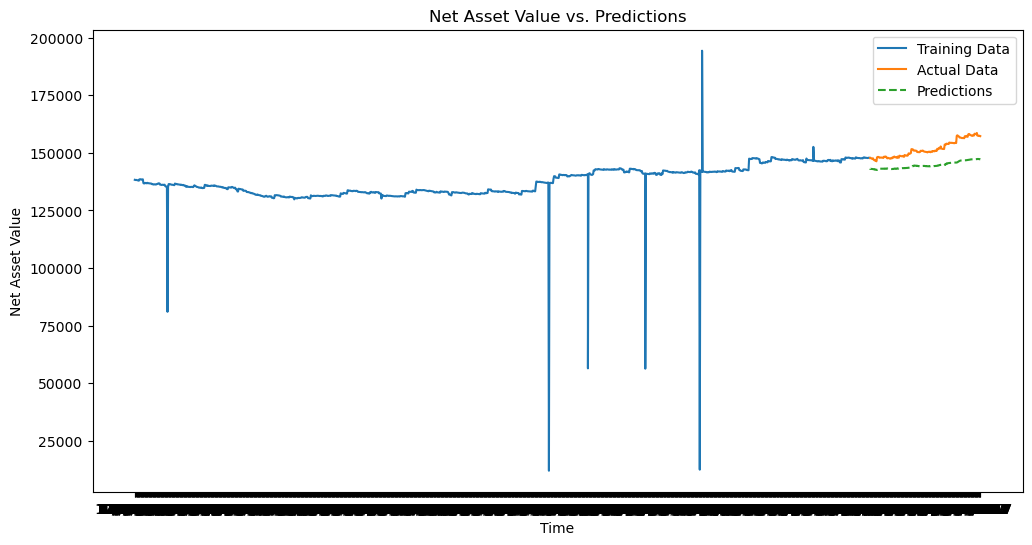

In [164]:
plt.figure(figsize=(12, 6))
plt.title('Net Asset Value vs. Predictions')
plt.xlabel('Time')
plt.ylabel('Net Asset Value')
plt.plot(train['Net Asset Value'], label='Training Data')
plt.plot(valid['Net Asset Value'], label='Actual Data')
plt.plot(valid['Predictions'], label='Predictions', linestyle='--')
plt.legend()
plt.show()

In [165]:
train

,Net Asset Value
Date Valued,
12/30/2022,138284.666171
12/29/2022,138195.676579
12/28/2022,138239.837793
12/27/2022,138222.014705
12/23/2022,138139.909581
...,...
10/20/2017,147833.163630
10/19/2017,147879.014394
10/19/2017,147879.014394


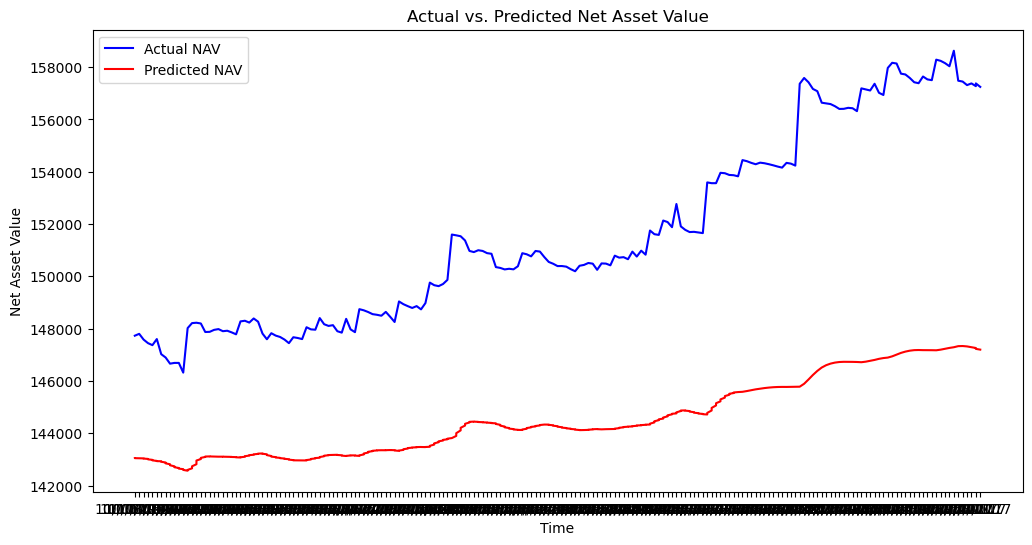

In [166]:
import matplotlib.pyplot as plt

# Assuming 'valid' is a DataFrame containing 'Net Asset Value' and 'Predictions' columns
plt.figure(figsize=(12, 6))
plt.title('Actual vs. Predicted Net Asset Value')
plt.xlabel('Time')
plt.ylabel('Net Asset Value')

# Plot the actual 'Net Asset Value' in blue
plt.plot(valid['Net Asset Value'], label='Actual NAV', color='blue')

# Plot the 'Predictions' in red
plt.plot(valid['Predictions'], label='Predicted NAV', color='red')

plt.legend()
plt.show()


In [167]:
valid

,Net Asset Value,Predictions
Date Valued,,
10/17/2017,147731.864352,143050.609375
10/17/2017,147731.864352,143049.125000
10/16/2017,147802.650876,143045.031250
10/16/2017,147802.650876,143042.421875
10/13/2017,147582.614603,143040.765625
...,...,...
1/6/2017,157314.320009,147321.750000
1/5/2017,157379.764690,147292.906250
1/4/2017,157274.056303,147261.593750


In [168]:
from sklearn.ensemble import RandomForestRegressor
features = ['Outstanding Number of Units', 'Nav Per Unit', 'Sale Price per Unit', 'Repurchase Price/Unit']
target = 'Net Asset Value'

X = data[features]
y = data[target]

# Initialize and train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=0)
rf_model.fit(X, y)

# Make predictions using the Random Forest model
rf_predictions = rf_model.predict(X)


In [169]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate predictions using the Random Forest model
rf_predictions = rf_model.predict(X)

# Calculate RMSE
rmse = mean_squared_error(y, rf_predictions, squared=False)

# Calculate MSE
mse = mean_squared_error(y, rf_predictions)

# Calculate R-squared (R2)
r2 = r2_score(y, rf_predictions)

print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

Root Mean Squared Error (RMSE): 2097.4967403706946
Mean Squared Error (MSE): 4399492.57586569
R-squared (R2): 0.949131856833062


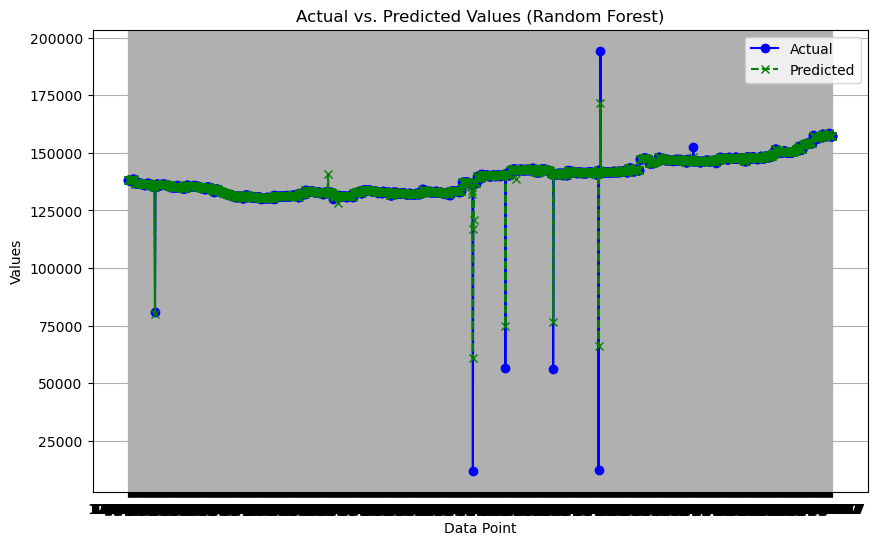

In [170]:

rf_predictions = rf_model.predict(X)

# Create a DataFrame with actual and predicted values
results = pd.DataFrame({'Actual': y, 'Predicted': rf_predictions})

# Plot actual and predicted values on the same axis
plt.figure(figsize=(10, 6))
plt.plot(results.index, results['Actual'], label='Actual', marker='o', linestyle='-', color='blue')
plt.plot(results.index, results['Predicted'], label='Predicted', marker='x', linestyle='--', color='green')
plt.xlabel('Data Point')
plt.ylabel('Values')
plt.title('Actual vs. Predicted Values (Random Forest)')
plt.grid(True)
plt.legend()
plt.show()
